# Chapter 01: Python Primer

## Modules

In [1]:
import random
from scipy.misc import factorial, comb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercises

### R-1.10
What parameters should be sent to the `range` constructor, to produce a range with values 8, 6, 4, 2, 0, -2, -4, -6, -8?

In [2]:
[i for i in range(8, -9, -2)]

[8, 6, 4, 2, 0, -2, -4, -6, -8]

### R-1.11 
Demonstrate how to use Python’s list comprehension syntax to produce the list [1, 2, 4, 8, 16, 32, 64, 128, 256].

In [3]:
[2**i for i in range(9)]

[1, 2, 4, 8, 16, 32, 64, 128, 256]

### R-1.12
Python's random module includes a function `choice(data)` that returns a random element from a non-empty sequence. The `random` module includes a more basic function `randrange`, with parametrization similar to the built-in `range` function, that return a random choice from the given range. Using only the `randrange` function, implement your own version of the `choice` function.

In [4]:
def choice(seq):
    idx = random.randrange(0, len(seq))
    return seq[idx]

In [5]:
x = list()
random.seed(42)
for i in range(500):
    x.append(choice([1, 2, 3, 4, 5]))

In [6]:
y = list()
random.seed(42)
for i in range(500):
    y.append(random.choice([1, 2, 3, 4, 5]))

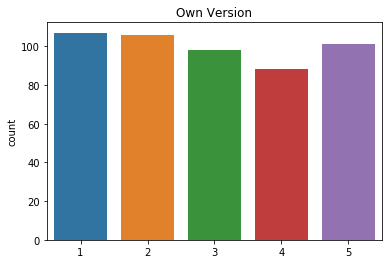

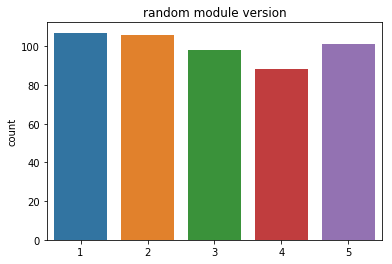

In [7]:
plt.figure()
plt.title('Own Version')
sns.countplot(x)

plt.figure()
plt.title('random module version')
sns.countplot(y)

### C-1.18
Demonstrate how to use Python’s list comprehension syntax to produce the list `[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]`.

We can think this series as:

$$ a_n = a_1 + \sum_{n=1}^{n-1} 2n$$ ($n >= 2$ and $a_1 = 0$)

Therefore series $a_n$ can be written as:

$\begin{align}
a_n & = a_1 + \sum_{n=1}^{n-1} b_n\\
& = 0 + 2 \cdot \frac{(n-1) \cdot n}{2}\\
& = n^2 - n\\
\end{align}$

In [8]:
[i**2 - i for i in range(1,11)]

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]

### C-1.23
Give an example of a Python code fragment that attempts to write an element to a list based on an index that may be out of bounds. If that index is out of bounds, the program should catch the exception that results, and print the following error message:

`"Don't try buffer overflow attacks in Python!"`

In [9]:
x = [1, 2, 3]

try:
    x[4] = 4
except IndexError:
    print("Don't try buffer overflow attacks in Python!")

Don't try buffer overflow attacks in Python!


### C-1.28
The **p-norm** of a vector $v = (v_1, v_2, \cdots, v_n)$ in $n$-dimensional space is defined as
$$\lVert v \rVert = \sqrt[p]{v_1^p + v_2^p + \cdots + v_n^p}$$.

For the special case of $p = 2$, this results in the traditional **Euclidean
norm**, which represents the length of the vector. For example, the Euclidean
norm of a two-dimensional vector with coordinates $(4,3)$ has a
Euclidean norm of $\sqrt{4^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5$. Give an implementation
of a function named norm such that $norm(v, p)$ returns the $p$-norm
value of $v$ and $norm(v)$ returns the Euclidean norm of $v$. You may assume
that $v$ is a list of numbers.

In [10]:
import numpy as np
def norm(v,p=2):
    v = np.array(v)
    power = v**p
    return power.sum()**(1/p)

In [11]:
v = [4,3]
print('norm(v,2):' , norm(v)) # Euclidean norm
print('norm(v,3):' , norm(v, 3))

norm(v,2): 5.0
norm(v,3): 4.497941445275415


### P-1.35
The **birthday paradox** says that the probability that two people in a room
will have the same birthday is more than half, provided $n$, the number of
people in the room, is more than 23. This property is not really a paradox,
but many people find it surprising. Design a Python program that can test
this paradox by a series of experiments on randomly generated birthdays,
which test this paradox for $n = 5,10,15,20, . . . ,100$.

We can think the probability of having same birth day as: 
$p(\text{same birthday}) = 1 - p(\text{different birthday})$

We will calculate the probability that all $n$ birthdays are different.

Let's consider the case when $n = 3$:

$$p = 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right)$$

In case of $n = 4$:

$$p = 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right) \cdot \left(1- \frac{3}{365}\right)$$

Now, we can generalize the equation for the case of $n$ people:

$\begin{align}
p &= 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right) \cdot \left(1- \frac{3}{365}\right) \cdots \left(1- \frac{n-1}{365}\right)\\
&= \frac{_{365}P_{n}}{365^n}
\end{align}
$

In [12]:
def same_birth_prob(n):
    return 1 - factorial(n) * comb(365, n) / (365**n)

$n=10$:

In [13]:
same_birth_prob(10)

/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  
/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  


0.11694817771107746

$n = 20$:

In [14]:
same_birth_prob(20)

/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  
/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  


0.4114383835806472

$n = 23$:

In [15]:
same_birth_prob(23)

/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  
/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  


0.5072972343239677

Let's visualize the result of this.

In [16]:
birth_prob = [same_birth_prob(i) for i in range(1,70)]

/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  
/home/jihoon/.local/share/virtualenvs/Data_Structures_and_Algorithms_in_Python-HfhZXZWc/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  


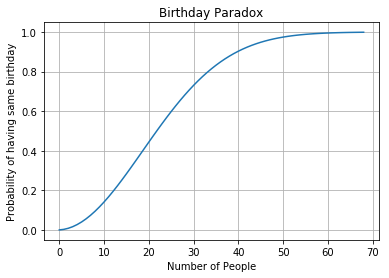

In [17]:
plt.figure()
plt.grid()
plt.xlabel('Number of People')
plt.ylabel('Probability of having same birthday')
plt.title('Birthday Paradox')
plt.plot(birth_prob)
